In [1]:
import sys
sys.path.append(r"E:\CMF\CMF_FFS/")

from src.metrics_calculation import metrics
from src.cross_val import timeseriesCVscore, timeseriesCVscore_catboost_grid
from src.preprocess import preprocessing

import numpy as np
import pandas as pd
from os import listdir
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit, train_test_split
import matplotlib.pyplot as plt

In [77]:
data_dir = '../data/processed/'
usd = pd.read_csv('../data/USD_RUB Historical Data.csv')

In [78]:
usd['Date'] = pd.to_datetime(usd['Date'])
usd['Date'].loc[140] = usd['Date'].loc[140] - pd.DateOffset(days=1)
usd['Date'] = usd['Date'].dt.strftime('%Y-%m')

C:\Users\grach\AppData\Local\Temp\ipykernel_10032\1373855568.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usd['Date'].loc[140] = usd['Date'].loc[140] - pd.DateOffset(days=1)


In [81]:
def add_usd(data, usd):
    data['usd'] = 0
    j = 0
    for i in range(len(usd['Date'])-1, 0, -1):
        if i == len(data['Equity Charge']):
            return data
        if data['Equity Charge'][j] == usd['Date'][i]:
            data['usd'][j] = usd['Price'][i]
            j += 1

In [82]:
def plots(names, metr):
    plt.rcParams["figure.figsize"] = (25,10)
    
    
    plt.plot(names[:26], metr[:78:3], label='MAPE')
    plt.plot(names[:26], metr[1:78:3], label='WAPE')
    #plt.plot(names[:26], metr[2:78:3], label='MSE') # MSE takes too large values so it's better not to display it
    plt.title('First half of companies')
    plt.legend()
    plt.show()
    
    
    
    plt.plot(names[26:], metr[78::3], label='MAPE')
    plt.plot(names[26:], metr[79::3], label='WAPE')
    #plt.plot(names[26:], metr[80::3], label='MSE') # MSE takes too large values so it's better not to display it
    plt.title('Second half of companies')
    plt.legend()
    plt.show()

C:\Users\grach\AppData\Local\Temp\ipykernel_10032\857076668.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['usd'][j] = usd['Price'][i]


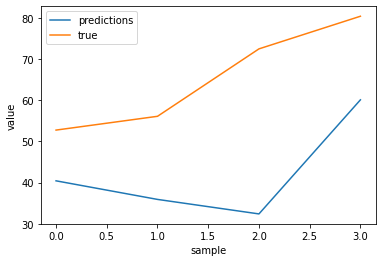

AMPY


C:\Users\grach\AppData\Local\Temp\ipykernel_10032\857076668.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['usd'][j] = usd['Price'][i]


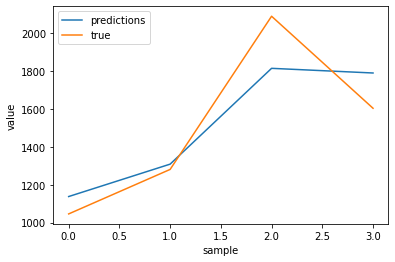

APA


C:\Users\grach\AppData\Local\Temp\ipykernel_10032\857076668.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['usd'][j] = usd['Price'][i]


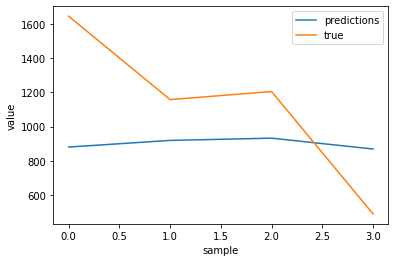

AR


C:\Users\grach\AppData\Local\Temp\ipykernel_10032\857076668.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['usd'][j] = usd['Price'][i]


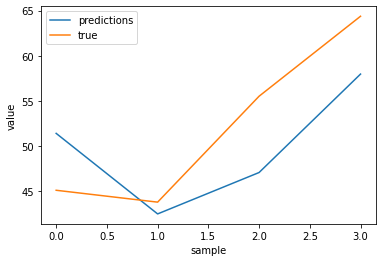

BATL


C:\Users\grach\AppData\Local\Temp\ipykernel_10032\857076668.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['usd'][j] = usd['Price'][i]


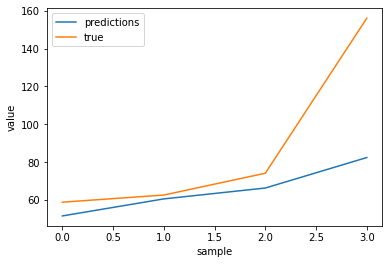

BCEI


C:\Users\grach\AppData\Local\Temp\ipykernel_10032\857076668.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['usd'][j] = usd['Price'][i]


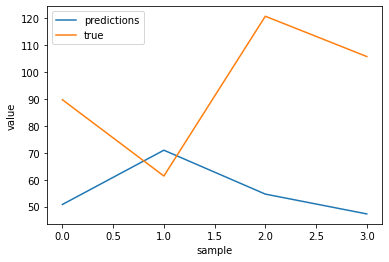

BRY


C:\Users\grach\AppData\Local\Temp\ipykernel_10032\857076668.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['usd'][j] = usd['Price'][i]


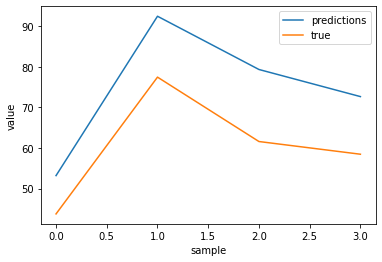

BSM


C:\Users\grach\AppData\Local\Temp\ipykernel_10032\857076668.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['usd'][j] = usd['Price'][i]


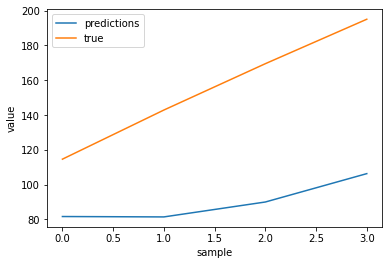

CDEV


C:\Users\grach\AppData\Local\Temp\ipykernel_10032\857076668.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['usd'][j] = usd['Price'][i]


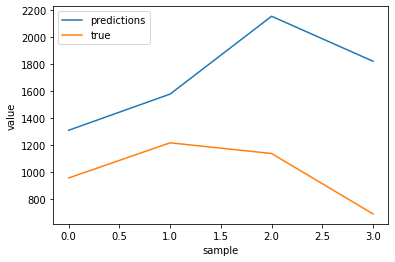

CHK


C:\Users\grach\AppData\Local\Temp\ipykernel_10032\857076668.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['usd'][j] = usd['Price'][i]


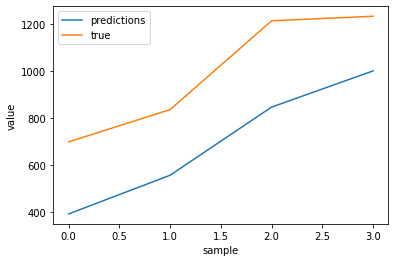

CLR


C:\Users\grach\AppData\Local\Temp\ipykernel_10032\857076668.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['usd'][j] = usd['Price'][i]


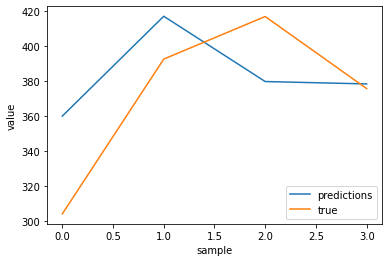

CNX


C:\Users\grach\AppData\Local\Temp\ipykernel_10032\857076668.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['usd'][j] = usd['Price'][i]


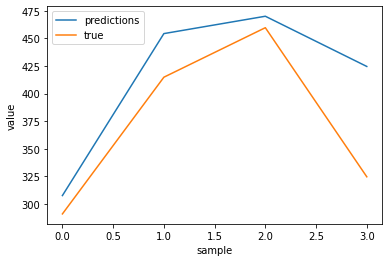

COG


C:\Users\grach\AppData\Local\Temp\ipykernel_10032\857076668.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['usd'][j] = usd['Price'][i]


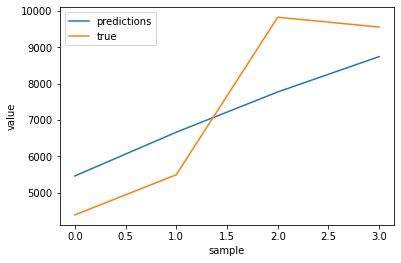

COP


C:\Users\grach\AppData\Local\Temp\ipykernel_10032\857076668.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['usd'][j] = usd['Price'][i]


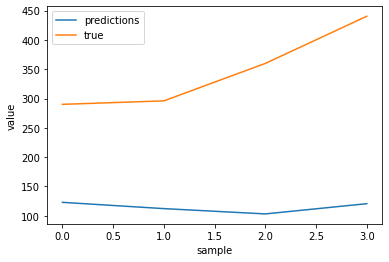

CPE


C:\Users\grach\AppData\Local\Temp\ipykernel_10032\857076668.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['usd'][j] = usd['Price'][i]


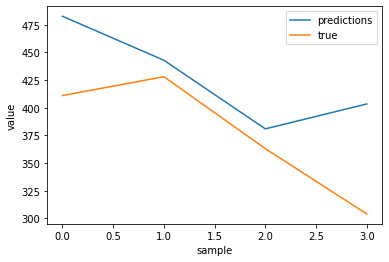

CRC


C:\Users\grach\AppData\Local\Temp\ipykernel_10032\857076668.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['usd'][j] = usd['Price'][i]


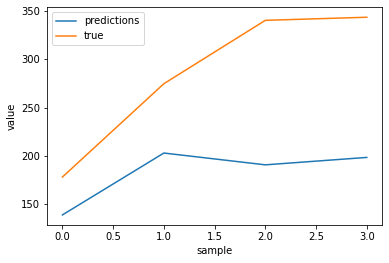

CRK


C:\Users\grach\AppData\Local\Temp\ipykernel_10032\857076668.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['usd'][j] = usd['Price'][i]


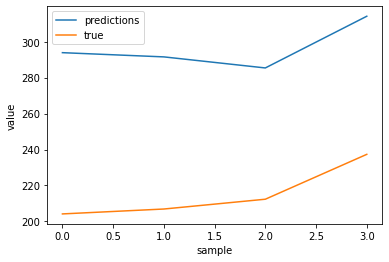

DEN


C:\Users\grach\AppData\Local\Temp\ipykernel_10032\857076668.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['usd'][j] = usd['Price'][i]


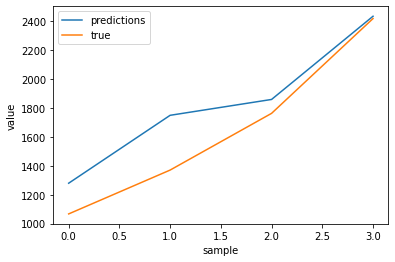

DVN


C:\Users\grach\AppData\Local\Temp\ipykernel_10032\857076668.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['usd'][j] = usd['Price'][i]


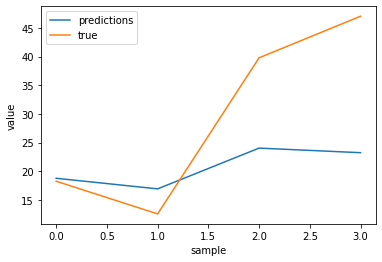

EGY


C:\Users\grach\AppData\Local\Temp\ipykernel_10032\857076668.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['usd'][j] = usd['Price'][i]


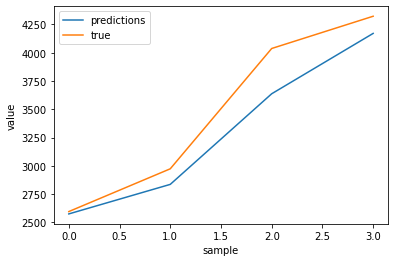

EOG


C:\Users\grach\AppData\Local\Temp\ipykernel_10032\857076668.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['usd'][j] = usd['Price'][i]


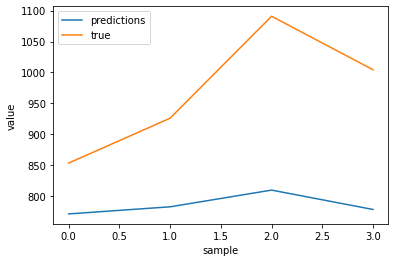

EQT


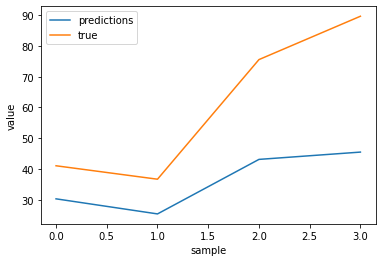

ESTE


C:\Users\grach\AppData\Local\Temp\ipykernel_10032\857076668.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['usd'][j] = usd['Price'][i]


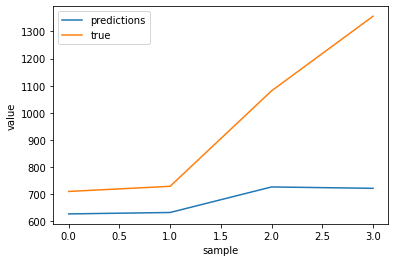

FANG


C:\Users\grach\AppData\Local\Temp\ipykernel_10032\857076668.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['usd'][j] = usd['Price'][i]


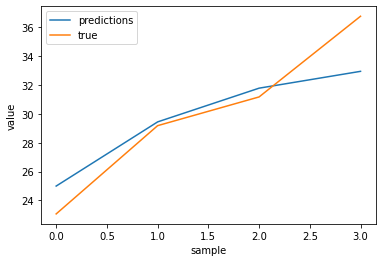

GDP


C:\Users\grach\AppData\Local\Temp\ipykernel_10032\857076668.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['usd'][j] = usd['Price'][i]


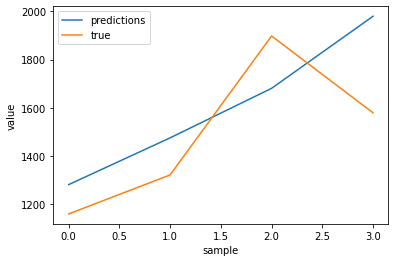

HES


C:\Users\grach\AppData\Local\Temp\ipykernel_10032\857076668.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['usd'][j] = usd['Price'][i]


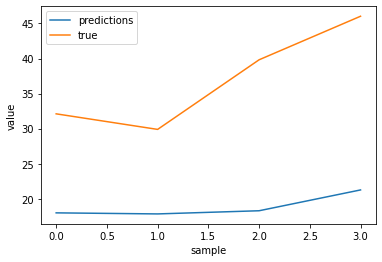

LONE


C:\Users\grach\AppData\Local\Temp\ipykernel_10032\857076668.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['usd'][j] = usd['Price'][i]


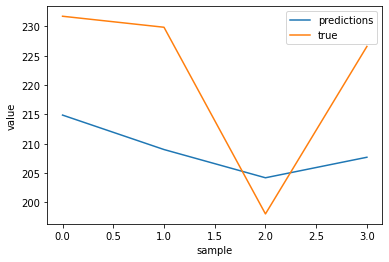

LPI


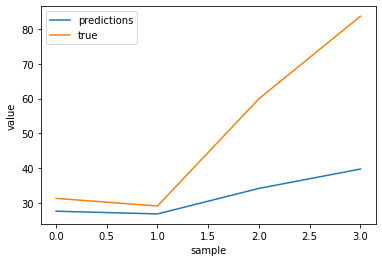

MCF


C:\Users\grach\AppData\Local\Temp\ipykernel_10032\857076668.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['usd'][j] = usd['Price'][i]


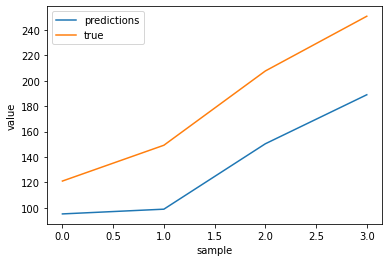

MGY


C:\Users\grach\AppData\Local\Temp\ipykernel_10032\857076668.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['usd'][j] = usd['Price'][i]


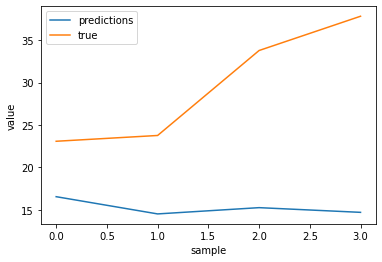

MNRL


C:\Users\grach\AppData\Local\Temp\ipykernel_10032\857076668.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['usd'][j] = usd['Price'][i]


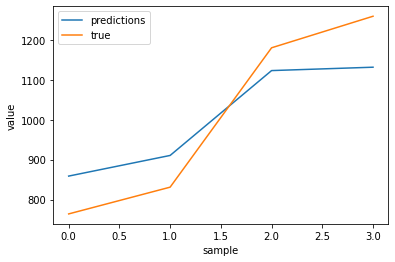

MRO


C:\Users\grach\AppData\Local\Temp\ipykernel_10032\857076668.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['usd'][j] = usd['Price'][i]


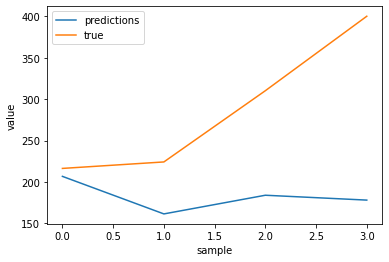

MTDR


C:\Users\grach\AppData\Local\Temp\ipykernel_10032\857076668.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['usd'][j] = usd['Price'][i]


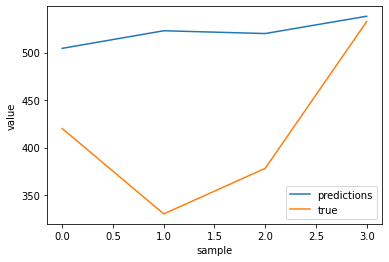

MUR


C:\Users\grach\AppData\Local\Temp\ipykernel_10032\857076668.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['usd'][j] = usd['Price'][i]


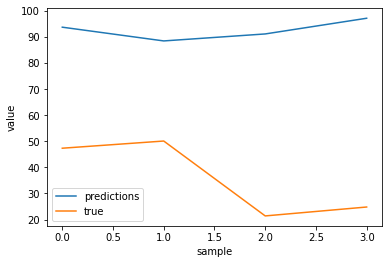

NOG


C:\Users\grach\AppData\Local\Temp\ipykernel_10032\857076668.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['usd'][j] = usd['Price'][i]


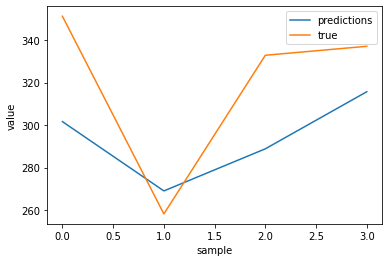

OAS


C:\Users\grach\AppData\Local\Temp\ipykernel_10032\857076668.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['usd'][j] = usd['Price'][i]


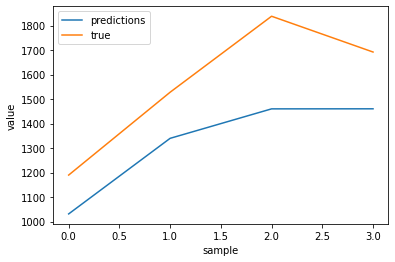

OVV


C:\Users\grach\AppData\Local\Temp\ipykernel_10032\857076668.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['usd'][j] = usd['Price'][i]


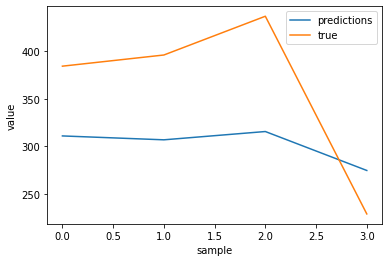

PDCE


C:\Users\grach\AppData\Local\Temp\ipykernel_10032\857076668.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['usd'][j] = usd['Price'][i]


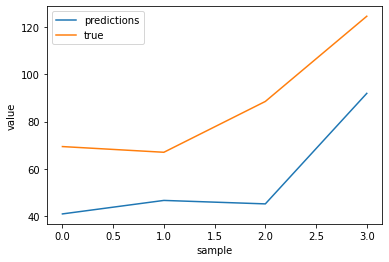

PVAC


C:\Users\grach\AppData\Local\Temp\ipykernel_10032\857076668.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['usd'][j] = usd['Price'][i]


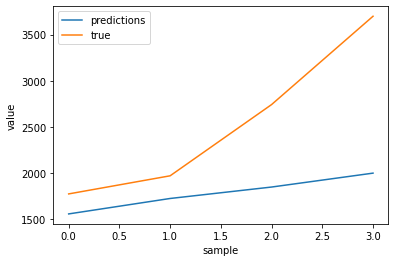

PXD


C:\Users\grach\AppData\Local\Temp\ipykernel_10032\857076668.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['usd'][j] = usd['Price'][i]


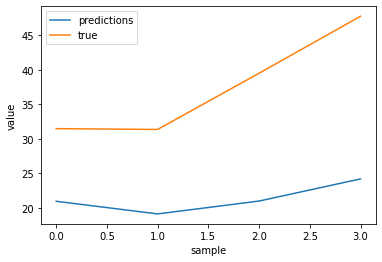

REI


C:\Users\grach\AppData\Local\Temp\ipykernel_10032\857076668.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['usd'][j] = usd['Price'][i]


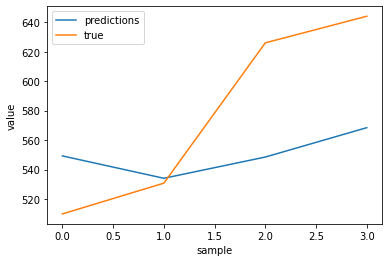

RRC


C:\Users\grach\AppData\Local\Temp\ipykernel_10032\857076668.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['usd'][j] = usd['Price'][i]


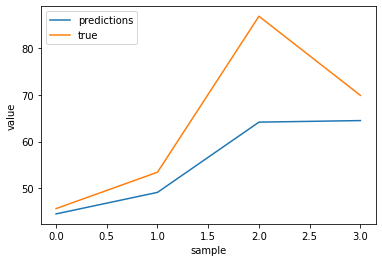

SBOW


C:\Users\grach\AppData\Local\Temp\ipykernel_10032\857076668.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['usd'][j] = usd['Price'][i]


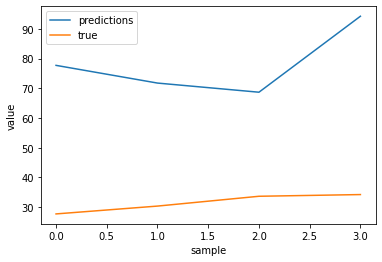

SD


C:\Users\grach\AppData\Local\Temp\ipykernel_10032\857076668.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['usd'][j] = usd['Price'][i]


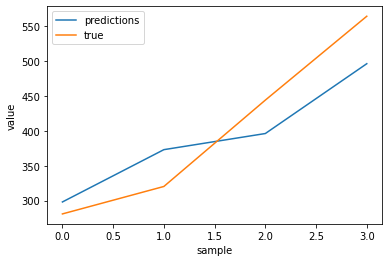

SM


C:\Users\grach\AppData\Local\Temp\ipykernel_10032\857076668.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['usd'][j] = usd['Price'][i]


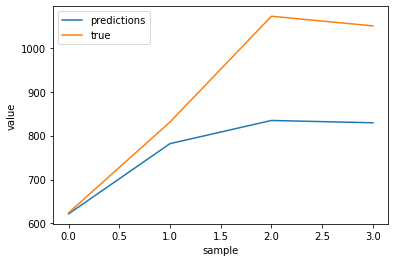

SWN


C:\Users\grach\AppData\Local\Temp\ipykernel_10032\857076668.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['usd'][j] = usd['Price'][i]


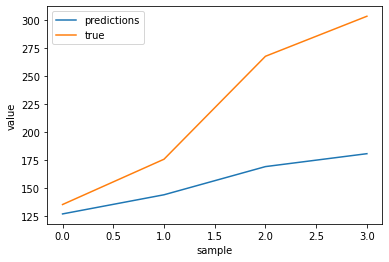

TALO


C:\Users\grach\AppData\Local\Temp\ipykernel_10032\857076668.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['usd'][j] = usd['Price'][i]


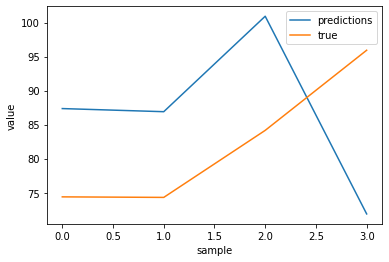

TPL


C:\Users\grach\AppData\Local\Temp\ipykernel_10032\857076668.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['usd'][j] = usd['Price'][i]


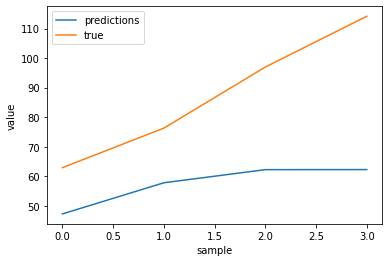

VNOM


C:\Users\grach\AppData\Local\Temp\ipykernel_10032\857076668.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['usd'][j] = usd['Price'][i]


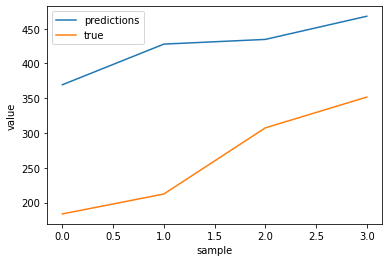

WLL


C:\Users\grach\AppData\Local\Temp\ipykernel_10032\857076668.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['usd'][j] = usd['Price'][i]


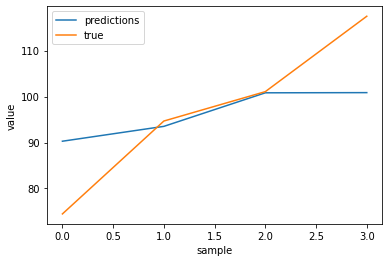

WTI


C:\Users\grach\AppData\Local\Temp\ipykernel_10032\857076668.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['usd'][j] = usd['Price'][i]


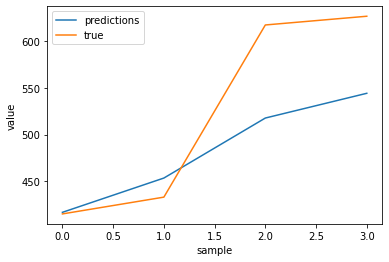

XEC


C:\Users\grach\AppData\Local\Temp\ipykernel_10032\857076668.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['usd'][j] = usd['Price'][i]


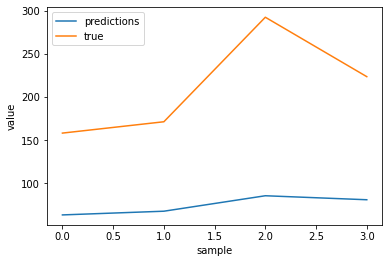

XOG
Mean MAPE = 0.3850746681342599
Mean WAPE = 0.32376419549767327
Mean MSE = 179783.9807452738


In [83]:
metr = np.array([])
names = []

for i in listdir(data_dir):
    data = pd.read_csv(data_dir + i)
    data['Equity Charge'] = pd.to_datetime(data['Equity Charge'])
    data['Equity Charge'] = data['Equity Charge'].dt.strftime('%Y-%m')
    data = add_usd(data, usd)
    
    mape, wape, mse = timeseriesCVscore(data, CatBoostRegressor(logging_level='Silent', task_type="GPU",
                           devices='0:1',  allow_const_label=True))
    metr = np.append(metr, [[mape], [wape], [mse]])
    names.append(i[:-4])
    print(i[:-4])
print('Mean MAPE =', metr[::3].sum() / len(metr[::3]) )
print('Mean WAPE =', metr[1::3].sum() / len(metr[1::3]) )
print('Mean MSE =', metr[2::3].sum() / len(metr[2::3]) )

    

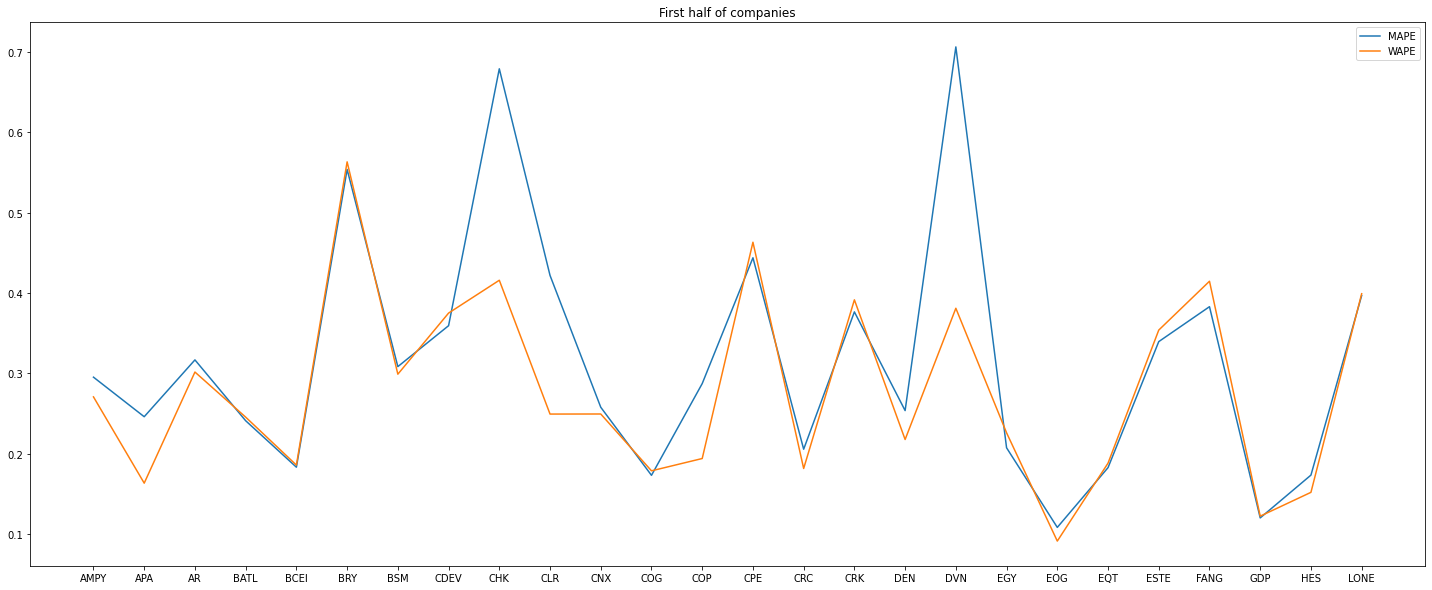

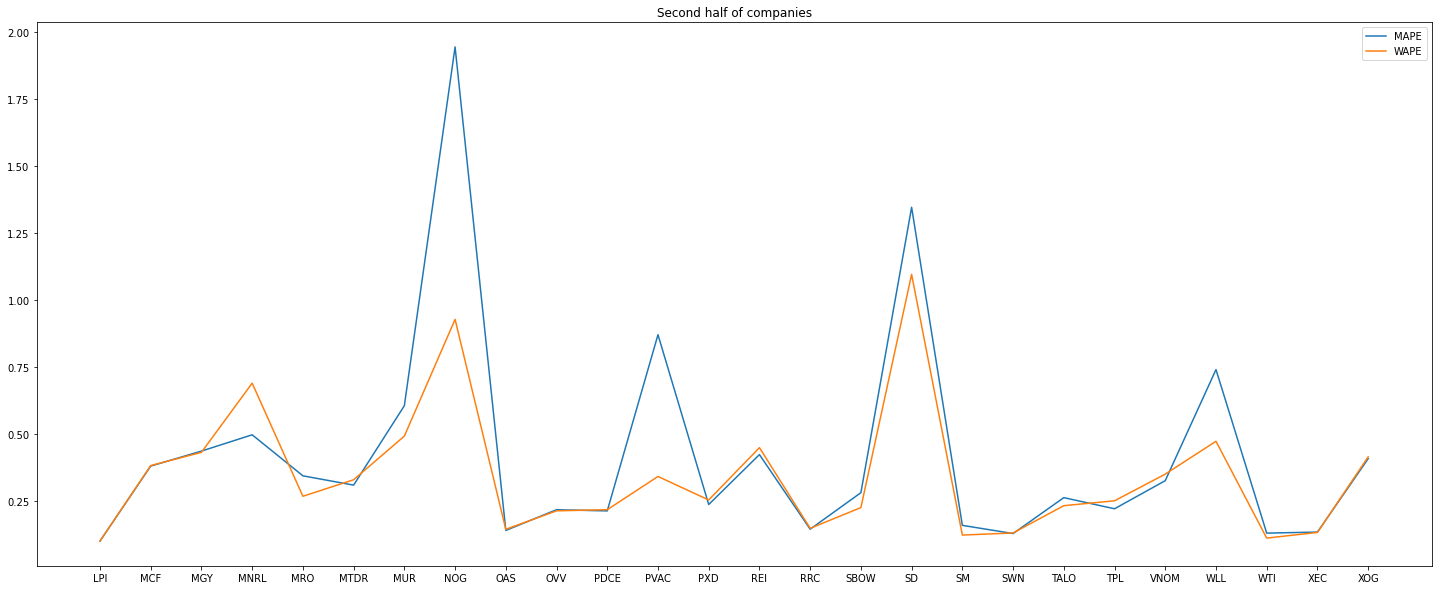

In [13]:
plots(names, metr)

In [4]:
params = {"learning_rate": np.append(np.arange(0.1,0.5,0.1), [3e-4]),
         "max_depth":np.arange(3, 7, 1)}

In [5]:
metr = np.array([])
names = []

for i in listdir(data_dir):
    data = pd.read_csv(data_dir + i)
    
    
    mape, wape, mse = timeseriesCVscore_catboost_grid(data, CatBoostRegressor(logging_level='Silent', task_type="GPU",
                           devices='0:1',  allow_const_label=True), params)
    metr = np.append(metr, [[mape], [wape], [mse]])
    names.append(i[:-4])
    print(i[:-4])
print('Mean MAPE =', metr[::3].sum() / len(metr[::3]) )
print('Mean WAPE =', metr[1::3].sum() / len(metr[1::3]) )
print('Mean MSE =', metr[2::3].sum() / len(metr[2::3]) )

    

0:	loss: 6.7699434	best: 6.7699434 (0)	total: 9.35s	remaining: 2m 57s
1:	loss: 9.8850201	best: 6.7699434 (0)	total: 21.6s	remaining: 3m 14s
2:	loss: 12.6944238	best: 6.7699434 (0)	total: 34.3s	remaining: 3m 14s
3:	loss: 12.9607625	best: 6.7699434 (0)	total: 47s	remaining: 3m 8s
4:	loss: 46.3550187	best: 6.7699434 (0)	total: 59.6s	remaining: 2m 58s
5:	loss: 17.3473990	best: 6.7699434 (0)	total: 1m 14s	remaining: 2m 52s
6:	loss: 10.8826994	best: 6.7699434 (0)	total: 1m 28s	remaining: 2m 44s
7:	loss: 12.4894743	best: 6.7699434 (0)	total: 1m 42s	remaining: 2m 34s
8:	loss: 9.9985625	best: 6.7699434 (0)	total: 1m 57s	remaining: 2m 23s
9:	loss: 47.7855759	best: 6.7699434 (0)	total: 2m 11s	remaining: 2m 11s
10:	loss: 15.5900455	best: 6.7699434 (0)	total: 2m 26s	remaining: 1m 59s
11:	loss: 6.5747193	best: 6.5747193 (11)	total: 2m 41s	remaining: 1m 47s
12:	loss: 5.5161342	best: 5.5161342 (12)	total: 2m 56s	remaining: 1m 35s
13:	loss: 6.5288923	best: 5.5161342 (12)	total: 3m 12s	remaining: 1m 22s

9:	loss: 1279.4218421	best: 146.7336221 (7)	total: 2m 9s	remaining: 2m 9s
10:	loss: 295.0575156	best: 146.7336221 (7)	total: 2m 23s	remaining: 1m 57s
11:	loss: 378.1467969	best: 146.7336221 (7)	total: 2m 37s	remaining: 1m 45s
12:	loss: 224.0578800	best: 146.7336221 (7)	total: 2m 52s	remaining: 1m 32s
13:	loss: 230.5286554	best: 146.7336221 (7)	total: 3m 6s	remaining: 1m 19s
14:	loss: 1296.1325646	best: 146.7336221 (7)	total: 3m 20s	remaining: 1m 6s
15:	loss: 303.0026686	best: 146.7336221 (7)	total: 3m 34s	remaining: 53.7s
16:	loss: 269.1412994	best: 146.7336221 (7)	total: 3m 48s	remaining: 40.3s
17:	loss: 226.4000193	best: 146.7336221 (7)	total: 4m 2s	remaining: 26.9s
18:	loss: 220.8803498	best: 146.7336221 (7)	total: 4m 16s	remaining: 13.5s
19:	loss: 1305.4863557	best: 146.7336221 (7)	total: 4m 29s	remaining: 0us
Estimating final quality...
APA
0:	loss: 323.9977495	best: 323.9977495 (0)	total: 10.3s	remaining: 3m 14s
1:	loss: 404.5049057	best: 323.9977495 (0)	total: 22.4s	remaining: 3

18:	loss: 24.2554446	best: 15.0571004 (5)	total: 4m 51s	remaining: 15.3s
19:	loss: 38.6150805	best: 15.0571004 (5)	total: 5m 7s	remaining: 0us
Estimating final quality...
0:	loss: 18.9761138	best: 18.9761138 (0)	total: 11.3s	remaining: 3m 34s
1:	loss: 22.7971990	best: 18.9761138 (0)	total: 24.2s	remaining: 3m 37s
2:	loss: 23.7929813	best: 18.9761138 (0)	total: 36.8s	remaining: 3m 28s
3:	loss: 32.9896446	best: 18.9761138 (0)	total: 50.1s	remaining: 3m 20s
4:	loss: 42.2928805	best: 18.9761138 (0)	total: 1m 4s	remaining: 3m 14s
5:	loss: 21.3528946	best: 18.9761138 (0)	total: 1m 21s	remaining: 3m 10s
6:	loss: 19.3798743	best: 18.9761138 (0)	total: 1m 37s	remaining: 3m
7:	loss: 19.8979950	best: 18.9761138 (0)	total: 1m 53s	remaining: 2m 50s
8:	loss: 16.8496192	best: 16.8496192 (8)	total: 2m 9s	remaining: 2m 38s
9:	loss: 43.6239857	best: 16.8496192 (8)	total: 2m 26s	remaining: 2m 26s
10:	loss: 23.8023939	best: 16.8496192 (8)	total: 2m 43s	remaining: 2m 14s
11:	loss: 18.3489349	best: 16.84961

9:	loss: 144.7759044	best: 130.8243609 (1)	total: 1m 55s	remaining: 1m 55s
10:	loss: 138.6712453	best: 130.8243609 (1)	total: 2m 7s	remaining: 1m 44s
11:	loss: 136.5296115	best: 130.8243609 (1)	total: 2m 20s	remaining: 1m 33s
12:	loss: 137.9953415	best: 130.8243609 (1)	total: 2m 31s	remaining: 1m 21s
13:	loss: 137.8514178	best: 130.8243609 (1)	total: 2m 43s	remaining: 1m 9s
14:	loss: 144.7613723	best: 130.8243609 (1)	total: 2m 56s	remaining: 58.7s
15:	loss: 137.2119060	best: 130.8243609 (1)	total: 3m 8s	remaining: 47.1s
16:	loss: 137.7152374	best: 130.8243609 (1)	total: 3m 19s	remaining: 35.2s
17:	loss: 137.2521142	best: 130.8243609 (1)	total: 3m 31s	remaining: 23.5s
18:	loss: 138.3576499	best: 130.8243609 (1)	total: 3m 44s	remaining: 11.8s
19:	loss: 144.7940039	best: 130.8243609 (1)	total: 3m 57s	remaining: 0us
Estimating final quality...
0:	loss: 168.7173001	best: 168.7173001 (0)	total: 9.54s	remaining: 3m 1s
1:	loss: 168.8409940	best: 168.7173001 (0)	total: 20.5s	remaining: 3m 4s
2:

19:	loss: 156.6420249	best: 148.2272151 (0)	total: 4m 12s	remaining: 0us
Estimating final quality...
0:	loss: 168.4595384	best: 168.4595384 (0)	total: 10.4s	remaining: 3m 18s
1:	loss: 168.4213002	best: 168.4213002 (1)	total: 22.5s	remaining: 3m 22s
2:	loss: 156.2414498	best: 156.2414498 (2)	total: 35s	remaining: 3m 18s
3:	loss: 161.5083755	best: 156.2414498 (2)	total: 47.2s	remaining: 3m 8s
4:	loss: 216.9792823	best: 156.2414498 (2)	total: 59.5s	remaining: 2m 58s
5:	loss: 175.0235252	best: 156.2414498 (2)	total: 1m 12s	remaining: 2m 50s
6:	loss: 174.6754260	best: 156.2414498 (2)	total: 1m 25s	remaining: 2m 39s
7:	loss: 187.7375578	best: 156.2414498 (2)	total: 1m 39s	remaining: 2m 28s
8:	loss: 167.6166172	best: 156.2414498 (2)	total: 1m 52s	remaining: 2m 17s
9:	loss: 218.1512520	best: 156.2414498 (2)	total: 2m 5s	remaining: 2m 5s
10:	loss: 187.8305123	best: 156.2414498 (2)	total: 2m 19s	remaining: 1m 54s
11:	loss: 188.5342310	best: 156.2414498 (2)	total: 2m 32s	remaining: 1m 41s
12:	los

7:	loss: 314.2682970	best: 215.8754946 (1)	total: 1m 26s	remaining: 2m 9s
8:	loss: 194.1085862	best: 194.1085862 (8)	total: 1m 37s	remaining: 1m 58s
9:	loss: 833.2921656	best: 194.1085862 (8)	total: 1m 48s	remaining: 1m 48s
10:	loss: 457.8730719	best: 194.1085862 (8)	total: 2m 1s	remaining: 1m 39s
11:	loss: 381.5910769	best: 194.1085862 (8)	total: 2m 14s	remaining: 1m 29s
12:	loss: 333.9978325	best: 194.1085862 (8)	total: 2m 26s	remaining: 1m 19s
13:	loss: 245.6111637	best: 194.1085862 (8)	total: 2m 38s	remaining: 1m 8s
14:	loss: 844.6385322	best: 194.1085862 (8)	total: 2m 52s	remaining: 57.6s
15:	loss: 461.9326701	best: 194.1085862 (8)	total: 3m 7s	remaining: 46.8s
16:	loss: 417.3243892	best: 194.1085862 (8)	total: 3m 21s	remaining: 35.6s
17:	loss: 404.1217329	best: 194.1085862 (8)	total: 3m 36s	remaining: 24s
18:	loss: 349.4749335	best: 194.1085862 (8)	total: 3m 50s	remaining: 12.1s
19:	loss: 856.8837436	best: 194.1085862 (8)	total: 4m 4s	remaining: 0us
Estimating final quality...
0:

16:	loss: 233.3746903	best: 154.4427862 (0)	total: 3m 47s	remaining: 40.1s
17:	loss: 264.6079204	best: 154.4427862 (0)	total: 4m 1s	remaining: 26.9s
18:	loss: 291.3318555	best: 154.4427862 (0)	total: 4m 15s	remaining: 13.5s
19:	loss: 406.4859699	best: 154.4427862 (0)	total: 4m 29s	remaining: 0us
Estimating final quality...
CNX
0:	loss: 212.2459511	best: 212.2459511 (0)	total: 10.6s	remaining: 3m 21s
1:	loss: 211.0924955	best: 211.0924955 (1)	total: 23.3s	remaining: 3m 29s
2:	loss: 180.2727101	best: 180.2727101 (2)	total: 36.1s	remaining: 3m 24s
3:	loss: 177.7179267	best: 177.7179267 (3)	total: 48.3s	remaining: 3m 13s
4:	loss: 401.0783641	best: 177.7179267 (3)	total: 1m	remaining: 3m
5:	loss: 212.3696659	best: 177.7179267 (3)	total: 1m 13s	remaining: 2m 52s
6:	loss: 209.0005482	best: 177.7179267 (3)	total: 1m 27s	remaining: 2m 42s
7:	loss: 181.5215495	best: 177.7179267 (3)	total: 1m 40s	remaining: 2m 31s
8:	loss: 161.5844561	best: 161.5844561 (8)	total: 1m 54s	remaining: 2m 19s
9:	loss:

3:	loss: 2339.8608933	best: 2163.5059510 (0)	total: 49.7s	remaining: 3m 18s
4:	loss: 5874.4606561	best: 2163.5059510 (0)	total: 1m 2s	remaining: 3m 7s
5:	loss: 2400.4554776	best: 2163.5059510 (0)	total: 1m 15s	remaining: 2m 55s
6:	loss: 1652.8089726	best: 1652.8089726 (6)	total: 1m 29s	remaining: 2m 46s
7:	loss: 2230.5956604	best: 1652.8089726 (6)	total: 1m 43s	remaining: 2m 35s
8:	loss: 2396.6523528	best: 1652.8089726 (6)	total: 1m 57s	remaining: 2m 24s
9:	loss: 6055.2872764	best: 1652.8089726 (6)	total: 2m 11s	remaining: 2m 11s
10:	loss: 1720.6854012	best: 1652.8089726 (6)	total: 2m 27s	remaining: 2m
11:	loss: 2839.3965028	best: 1652.8089726 (6)	total: 2m 42s	remaining: 1m 48s
12:	loss: 3282.5678972	best: 1652.8089726 (6)	total: 2m 57s	remaining: 1m 35s
13:	loss: 3149.1462335	best: 1652.8089726 (6)	total: 3m 12s	remaining: 1m 22s
14:	loss: 6190.5424641	best: 1652.8089726 (6)	total: 3m 26s	remaining: 1m 8s
15:	loss: 1749.4107579	best: 1652.8089726 (6)	total: 3m 41s	remaining: 55.4s
16

12:	loss: 262.1504646	best: 126.7396534 (7)	total: 2m 49s	remaining: 1m 31s
13:	loss: 186.1476349	best: 126.7396534 (7)	total: 3m 2s	remaining: 1m 18s
14:	loss: 624.1609225	best: 126.7396534 (7)	total: 3m 16s	remaining: 1m 5s
15:	loss: 293.9736079	best: 126.7396534 (7)	total: 3m 30s	remaining: 52.7s
16:	loss: 296.3712681	best: 126.7396534 (7)	total: 3m 44s	remaining: 39.7s
17:	loss: 257.5831696	best: 126.7396534 (7)	total: 3m 58s	remaining: 26.5s
18:	loss: 197.1359212	best: 126.7396534 (7)	total: 4m 11s	remaining: 13.3s
19:	loss: 627.7584271	best: 126.7396534 (7)	total: 4m 25s	remaining: 0us
Estimating final quality...
0:	loss: 80.5888273	best: 80.5888273 (0)	total: 10.9s	remaining: 3m 27s
1:	loss: 97.3235683	best: 80.5888273 (0)	total: 23.6s	remaining: 3m 32s
2:	loss: 56.3713989	best: 56.3713989 (2)	total: 35.5s	remaining: 3m 20s
3:	loss: 56.9327145	best: 56.3713989 (2)	total: 47.5s	remaining: 3m 9s
4:	loss: 576.9159926	best: 56.3713989 (2)	total: 59.5s	remaining: 2m 58s
5:	loss: 123.

2:	loss: 65.7672035	best: 38.0902286 (0)	total: 34s	remaining: 3m 12s
3:	loss: 98.0593559	best: 38.0902286 (0)	total: 46.1s	remaining: 3m 4s
4:	loss: 273.4544638	best: 38.0902286 (0)	total: 58s	remaining: 2m 54s
5:	loss: 85.8428310	best: 38.0902286 (0)	total: 1m 11s	remaining: 2m 46s
6:	loss: 76.8688006	best: 38.0902286 (0)	total: 1m 24s	remaining: 2m 37s
7:	loss: 88.7956717	best: 38.0902286 (0)	total: 1m 38s	remaining: 2m 27s
8:	loss: 93.0684692	best: 38.0902286 (0)	total: 1m 51s	remaining: 2m 16s
9:	loss: 280.8132005	best: 38.0902286 (0)	total: 2m 4s	remaining: 2m 4s
10:	loss: 122.6745659	best: 38.0902286 (0)	total: 2m 18s	remaining: 1m 53s
11:	loss: 99.4792692	best: 38.0902286 (0)	total: 2m 32s	remaining: 1m 41s
12:	loss: 81.4062200	best: 38.0902286 (0)	total: 2m 46s	remaining: 1m 29s
13:	loss: 93.9674680	best: 38.0902286 (0)	total: 3m	remaining: 1m 17s
14:	loss: 284.6532038	best: 38.0902286 (0)	total: 3m 13s	remaining: 1m 4s
15:	loss: 118.3937561	best: 38.0902286 (0)	total: 3m 27s	

11:	loss: 5.6142901	best: 3.7467909 (0)	total: 2m 43s	remaining: 1m 48s
12:	loss: 6.1495598	best: 3.7467909 (0)	total: 2m 58s	remaining: 1m 35s
13:	loss: 5.9228171	best: 3.7467909 (0)	total: 3m 12s	remaining: 1m 22s
14:	loss: 18.9898312	best: 3.7467909 (0)	total: 3m 27s	remaining: 1m 9s
15:	loss: 8.6910065	best: 3.7467909 (0)	total: 3m 41s	remaining: 55.4s
16:	loss: 7.4788248	best: 3.7467909 (0)	total: 3m 55s	remaining: 41.5s
17:	loss: 6.0760680	best: 3.7467909 (0)	total: 4m 9s	remaining: 27.7s
18:	loss: 6.5773177	best: 3.7467909 (0)	total: 4m 23s	remaining: 13.9s
19:	loss: 19.2326762	best: 3.7467909 (0)	total: 4m 37s	remaining: 0us
Estimating final quality...
0:	loss: 3.7894298	best: 3.7894298 (0)	total: 10.1s	remaining: 3m 11s
1:	loss: 2.3648082	best: 2.3648082 (1)	total: 22s	remaining: 3m 18s
2:	loss: 3.0664750	best: 2.3648082 (1)	total: 33.2s	remaining: 3m 7s
3:	loss: 3.4218242	best: 2.3648082 (1)	total: 43.9s	remaining: 2m 55s
4:	loss: 20.1680129	best: 2.3648082 (1)	total: 55.9s	r

EOG
0:	loss: 700.8925857	best: 700.8925857 (0)	total: 10.8s	remaining: 3m 25s
1:	loss: 719.4907342	best: 700.8925857 (0)	total: 23.6s	remaining: 3m 32s
2:	loss: 637.9267199	best: 637.9267199 (2)	total: 36.4s	remaining: 3m 26s
3:	loss: 709.2064521	best: 637.9267199 (2)	total: 48.9s	remaining: 3m 15s
4:	loss: 856.2045608	best: 637.9267199 (2)	total: 1m	remaining: 3m 2s
5:	loss: 739.1370813	best: 637.9267199 (2)	total: 1m 14s	remaining: 2m 54s
6:	loss: 746.9795847	best: 637.9267199 (2)	total: 1m 28s	remaining: 2m 43s
7:	loss: 656.3941588	best: 637.9267199 (2)	total: 1m 41s	remaining: 2m 32s
8:	loss: 752.1542949	best: 637.9267199 (2)	total: 1m 55s	remaining: 2m 21s
9:	loss: 862.4576318	best: 637.9267199 (2)	total: 2m 8s	remaining: 2m 8s
10:	loss: 755.3589103	best: 637.9267199 (2)	total: 2m 23s	remaining: 1m 57s
11:	loss: 732.4821670	best: 637.9267199 (2)	total: 2m 35s	remaining: 1m 43s
12:	loss: 720.1039855	best: 637.9267199 (2)	total: 2m 50s	remaining: 1m 31s
13:	loss: 731.8727690	best: 6

10:	loss: 25.0387566	best: 16.7304902 (8)	total: 2m 6s	remaining: 1m 43s
11:	loss: 26.3414458	best: 16.7304902 (8)	total: 2m 19s	remaining: 1m 32s
12:	loss: 22.5011271	best: 16.7304902 (8)	total: 2m 31s	remaining: 1m 21s
13:	loss: 23.6998468	best: 16.7304902 (8)	total: 2m 44s	remaining: 1m 10s
14:	loss: 42.8181751	best: 16.7304902 (8)	total: 2m 57s	remaining: 59.1s
15:	loss: 28.3043619	best: 16.7304902 (8)	total: 3m 10s	remaining: 47.7s
16:	loss: 31.2563001	best: 16.7304902 (8)	total: 3m 23s	remaining: 35.9s
17:	loss: 32.3454181	best: 16.7304902 (8)	total: 3m 36s	remaining: 24.1s
18:	loss: 29.4392043	best: 16.7304902 (8)	total: 3m 49s	remaining: 12.1s
19:	loss: 43.1816996	best: 16.7304902 (8)	total: 4m 2s	remaining: 0us
Estimating final quality...
ESTE
0:	loss: 259.4925336	best: 259.4925336 (0)	total: 10.3s	remaining: 3m 15s
1:	loss: 250.7917047	best: 250.7917047 (1)	total: 22s	remaining: 3m 17s
2:	loss: 250.6341540	best: 250.6341540 (2)	total: 33.6s	remaining: 3m 10s
3:	loss: 228.9834

0:	loss: 10.4036294	best: 10.4036294 (0)	total: 10.2s	remaining: 3m 13s
1:	loss: 8.3775940	best: 8.3775940 (1)	total: 22.2s	remaining: 3m 20s
2:	loss: 10.8130546	best: 8.3775940 (1)	total: 34.4s	remaining: 3m 15s
3:	loss: 9.6766316	best: 8.3775940 (1)	total: 46.8s	remaining: 3m 7s
4:	loss: 25.6901397	best: 8.3775940 (1)	total: 59s	remaining: 2m 56s
5:	loss: 8.4377215	best: 8.3775940 (1)	total: 1m 12s	remaining: 2m 49s
6:	loss: 8.1232096	best: 8.1232096 (6)	total: 1m 25s	remaining: 2m 39s
7:	loss: 5.5587423	best: 5.5587423 (7)	total: 1m 39s	remaining: 2m 29s
8:	loss: 10.5280380	best: 5.5587423 (7)	total: 1m 52s	remaining: 2m 17s
9:	loss: 26.3389339	best: 5.5587423 (7)	total: 2m 6s	remaining: 2m 6s
10:	loss: 4.8357600	best: 4.8357600 (10)	total: 2m 20s	remaining: 1m 54s
11:	loss: 5.8373002	best: 4.8357600 (10)	total: 2m 34s	remaining: 1m 42s
12:	loss: 10.7422901	best: 4.8357600 (10)	total: 2m 47s	remaining: 1m 30s
13:	loss: 9.0213218	best: 4.8357600 (10)	total: 3m 1s	remaining: 1m 17s
14

10:	loss: 30.7565211	best: 23.8854638 (3)	total: 2m 16s	remaining: 1m 51s
11:	loss: 29.6327244	best: 23.8854638 (3)	total: 2m 29s	remaining: 1m 39s
12:	loss: 32.9495416	best: 23.8854638 (3)	total: 2m 43s	remaining: 1m 28s
13:	loss: 28.0605338	best: 23.8854638 (3)	total: 2m 57s	remaining: 1m 15s
14:	loss: 41.9233746	best: 23.8854638 (3)	total: 3m 11s	remaining: 1m 3s
15:	loss: 31.7277455	best: 23.8854638 (3)	total: 3m 25s	remaining: 51.3s
16:	loss: 31.9657606	best: 23.8854638 (3)	total: 3m 38s	remaining: 38.6s
17:	loss: 32.6894451	best: 23.8854638 (3)	total: 3m 51s	remaining: 25.8s
18:	loss: 28.9297877	best: 23.8854638 (3)	total: 4m 4s	remaining: 12.9s
19:	loss: 42.1134138	best: 23.8854638 (3)	total: 4m 19s	remaining: 0us
Estimating final quality...
0:	loss: 22.2565312	best: 22.2565312 (0)	total: 10.1s	remaining: 3m 11s
1:	loss: 22.0753285	best: 22.0753285 (1)	total: 21.9s	remaining: 3m 16s
2:	loss: 23.3001064	best: 22.0753285 (1)	total: 34s	remaining: 3m 12s
3:	loss: 22.8401334	best: 2

1:	loss: 1.9379841	best: 0.8524299 (0)	total: 21.8s	remaining: 3m 16s
2:	loss: 2.3998379	best: 0.8524299 (0)	total: 33.8s	remaining: 3m 11s
3:	loss: 3.3079144	best: 0.8524299 (0)	total: 45.7s	remaining: 3m 2s
4:	loss: 13.7060867	best: 0.8524299 (0)	total: 57.6s	remaining: 2m 52s
5:	loss: 2.4134627	best: 0.8524299 (0)	total: 1m 11s	remaining: 2m 45s
6:	loss: 2.5100393	best: 0.8524299 (0)	total: 1m 24s	remaining: 2m 36s
7:	loss: 2.5482053	best: 0.8524299 (0)	total: 1m 37s	remaining: 2m 26s
8:	loss: 3.0436334	best: 0.8524299 (0)	total: 1m 51s	remaining: 2m 16s
9:	loss: 14.1334248	best: 0.8524299 (0)	total: 2m 4s	remaining: 2m 4s
10:	loss: 2.4297296	best: 0.8524299 (0)	total: 2m 18s	remaining: 1m 53s
11:	loss: 3.1216877	best: 0.8524299 (0)	total: 2m 32s	remaining: 1m 41s
12:	loss: 4.5766842	best: 0.8524299 (0)	total: 2m 46s	remaining: 1m 29s
13:	loss: 4.1041860	best: 0.8524299 (0)	total: 3m	remaining: 1m 17s
14:	loss: 14.3768717	best: 0.8524299 (0)	total: 3m 14s	remaining: 1m 4s
15:	loss: 

12:	loss: 0.0000000	best: 0.0000000 (0)	total: 2m 7s	remaining: 1m 8s
13:	loss: 0.0000000	best: 0.0000000 (0)	total: 2m 17s	remaining: 58.8s
14:	loss: 0.0000000	best: 0.0000000 (0)	total: 2m 27s	remaining: 49s
15:	loss: 0.0000000	best: 0.0000000 (0)	total: 2m 36s	remaining: 39.2s
16:	loss: 0.0000000	best: 0.0000000 (0)	total: 2m 46s	remaining: 29.4s
17:	loss: 0.0000000	best: 0.0000000 (0)	total: 2m 56s	remaining: 19.6s
18:	loss: 0.0000000	best: 0.0000000 (0)	total: 3m 6s	remaining: 9.82s
19:	loss: 0.0000000	best: 0.0000000 (0)	total: 3m 16s	remaining: 0us
Estimating final quality...
0:	loss: 11.5590532	best: 11.5590532 (0)	total: 9.03s	remaining: 2m 51s
1:	loss: 11.5590532	best: 11.5590532 (0)	total: 19.3s	remaining: 2m 54s
2:	loss: 11.5590532	best: 11.5590532 (0)	total: 29.6s	remaining: 2m 47s
3:	loss: 11.5590532	best: 11.5590532 (0)	total: 40s	remaining: 2m 39s
4:	loss: 11.5590532	best: 11.5590532 (0)	total: 50.3s	remaining: 2m 30s
5:	loss: 11.5590532	best: 11.5590532 (0)	total: 1m	r

2:	loss: 97.8152489	best: 94.7070215 (1)	total: 34.9s	remaining: 3m 18s
3:	loss: 109.2191509	best: 94.7070215 (1)	total: 46.4s	remaining: 3m 5s
4:	loss: 151.1227598	best: 94.7070215 (1)	total: 57.8s	remaining: 2m 53s
5:	loss: 119.8498627	best: 94.7070215 (1)	total: 1m 10s	remaining: 2m 44s
6:	loss: 108.8234965	best: 94.7070215 (1)	total: 1m 22s	remaining: 2m 32s
7:	loss: 111.4274685	best: 94.7070215 (1)	total: 1m 34s	remaining: 2m 22s
8:	loss: 120.7357868	best: 94.7070215 (1)	total: 1m 47s	remaining: 2m 10s
9:	loss: 152.7387049	best: 94.7070215 (1)	total: 1m 59s	remaining: 1m 59s
10:	loss: 121.4141447	best: 94.7070215 (1)	total: 2m 11s	remaining: 1m 47s
11:	loss: 110.4342282	best: 94.7070215 (1)	total: 2m 25s	remaining: 1m 36s
12:	loss: 113.8902981	best: 94.7070215 (1)	total: 2m 39s	remaining: 1m 25s
13:	loss: 131.8551328	best: 94.7070215 (1)	total: 2m 53s	remaining: 1m 14s
14:	loss: 154.0403424	best: 94.7070215 (1)	total: 3m 7s	remaining: 1m 2s
15:	loss: 130.4175586	best: 94.7070215 (

11:	loss: 329.6324421	best: 208.0953432 (8)	total: 2m 34s	remaining: 1m 42s
12:	loss: 348.5345437	best: 208.0953432 (8)	total: 2m 48s	remaining: 1m 30s
13:	loss: 339.5290511	best: 208.0953432 (8)	total: 3m 1s	remaining: 1m 17s
14:	loss: 585.5482474	best: 208.0953432 (8)	total: 3m 15s	remaining: 1m 5s
15:	loss: 393.6267267	best: 208.0953432 (8)	total: 3m 30s	remaining: 52.6s
16:	loss: 292.3494805	best: 208.0953432 (8)	total: 3m 44s	remaining: 39.6s
17:	loss: 372.6480411	best: 208.0953432 (8)	total: 3m 57s	remaining: 26.4s
18:	loss: 427.1974990	best: 208.0953432 (8)	total: 4m 11s	remaining: 13.3s
19:	loss: 597.6743731	best: 208.0953432 (8)	total: 4m 26s	remaining: 0us
Estimating final quality...
MUR
0:	loss: 18.6240332	best: 18.6240332 (0)	total: 10.8s	remaining: 3m 25s
1:	loss: 18.1897064	best: 18.1897064 (1)	total: 23.7s	remaining: 3m 32s
2:	loss: 16.5284936	best: 16.5284936 (2)	total: 36.4s	remaining: 3m 26s
3:	loss: 18.3979017	best: 16.5284936 (2)	total: 49.1s	remaining: 3m 16s
4:	lo

0:	loss: 184.5859175	best: 184.5859175 (0)	total: 10.9s	remaining: 3m 27s
1:	loss: 178.2603159	best: 178.2603159 (1)	total: 22.8s	remaining: 3m 24s
2:	loss: 181.0183757	best: 178.2603159 (1)	total: 34s	remaining: 3m 12s
3:	loss: 183.7419003	best: 178.2603159 (1)	total: 46.1s	remaining: 3m 4s
4:	loss: 441.0611140	best: 178.2603159 (1)	total: 57.9s	remaining: 2m 53s
5:	loss: 209.3198621	best: 178.2603159 (1)	total: 1m 10s	remaining: 2m 45s
6:	loss: 212.7523134	best: 178.2603159 (1)	total: 1m 23s	remaining: 2m 35s
7:	loss: 210.5454969	best: 178.2603159 (1)	total: 1m 36s	remaining: 2m 24s
8:	loss: 208.8532492	best: 178.2603159 (1)	total: 1m 49s	remaining: 2m 14s
9:	loss: 447.0836226	best: 178.2603159 (1)	total: 2m 3s	remaining: 2m 3s
10:	loss: 257.1569468	best: 178.2603159 (1)	total: 2m 18s	remaining: 1m 53s
11:	loss: 227.5349218	best: 178.2603159 (1)	total: 2m 33s	remaining: 1m 42s
12:	loss: 228.9064270	best: 178.2603159 (1)	total: 2m 48s	remaining: 1m 30s
13:	loss: 218.8482101	best: 178.

8:	loss: 247.3948550	best: 224.7234610 (1)	total: 1m 56s	remaining: 2m 22s
9:	loss: 307.9771269	best: 224.7234610 (1)	total: 2m 10s	remaining: 2m 10s
10:	loss: 244.2425427	best: 224.7234610 (1)	total: 2m 24s	remaining: 1m 58s
11:	loss: 274.7274299	best: 224.7234610 (1)	total: 2m 39s	remaining: 1m 46s
12:	loss: 279.4355280	best: 224.7234610 (1)	total: 2m 53s	remaining: 1m 33s
13:	loss: 277.4670508	best: 224.7234610 (1)	total: 3m 8s	remaining: 1m 20s
14:	loss: 308.9590530	best: 224.7234610 (1)	total: 3m 21s	remaining: 1m 7s
15:	loss: 269.0597053	best: 224.7234610 (1)	total: 3m 35s	remaining: 53.9s
16:	loss: 272.9714303	best: 224.7234610 (1)	total: 3m 49s	remaining: 40.5s
17:	loss: 282.5935212	best: 224.7234610 (1)	total: 4m 3s	remaining: 27.1s
18:	loss: 271.0552461	best: 224.7234610 (1)	total: 4m 17s	remaining: 13.5s
19:	loss: 309.6197841	best: 224.7234610 (1)	total: 4m 31s	remaining: 0us
Estimating final quality...
0:	loss: 200.5142023	best: 200.5142023 (0)	total: 10.8s	remaining: 3m 24

17:	loss: 1460.6224700	best: 1205.1757825 (0)	total: 3m 56s	remaining: 26.2s
18:	loss: 1468.0957053	best: 1205.1757825 (0)	total: 4m 9s	remaining: 13.2s
19:	loss: 1654.4220542	best: 1205.1757825 (0)	total: 4m 23s	remaining: 0us
Estimating final quality...
0:	loss: 1619.6544605	best: 1619.6544605 (0)	total: 10.3s	remaining: 3m 14s
1:	loss: 1540.6482866	best: 1540.6482866 (1)	total: 22.2s	remaining: 3m 20s
2:	loss: 1461.3923889	best: 1461.3923889 (2)	total: 34.2s	remaining: 3m 14s
3:	loss: 1576.0882861	best: 1461.3923889 (2)	total: 46.2s	remaining: 3m 4s
4:	loss: 2106.8447634	best: 1461.3923889 (2)	total: 58.1s	remaining: 2m 54s
5:	loss: 1764.0249431	best: 1461.3923889 (2)	total: 1m 11s	remaining: 2m 46s
6:	loss: 1833.8350915	best: 1461.3923889 (2)	total: 1m 24s	remaining: 2m 37s
7:	loss: 1837.7410823	best: 1461.3923889 (2)	total: 1m 38s	remaining: 2m 27s
8:	loss: 1874.1087024	best: 1461.3923889 (2)	total: 1m 51s	remaining: 2m 16s
9:	loss: 2129.1913287	best: 1461.3923889 (2)	total: 2m 4s

6:	loss: 444.0561385	best: 385.8149249 (0)	total: 1m 22s	remaining: 2m 33s
7:	loss: 504.9061175	best: 385.8149249 (0)	total: 1m 36s	remaining: 2m 24s
8:	loss: 530.8085617	best: 385.8149249 (0)	total: 1m 50s	remaining: 2m 14s
9:	loss: 636.8539210	best: 385.8149249 (0)	total: 2m 4s	remaining: 2m 4s
10:	loss: 511.0901135	best: 385.8149249 (0)	total: 2m 18s	remaining: 1m 53s
11:	loss: 488.2357482	best: 385.8149249 (0)	total: 2m 32s	remaining: 1m 41s
12:	loss: 513.9527378	best: 385.8149249 (0)	total: 2m 46s	remaining: 1m 29s
13:	loss: 556.1599740	best: 385.8149249 (0)	total: 3m	remaining: 1m 17s
14:	loss: 641.5944981	best: 385.8149249 (0)	total: 3m 13s	remaining: 1m 4s
15:	loss: 471.6621540	best: 385.8149249 (0)	total: 3m 27s	remaining: 51.9s
16:	loss: 494.2393145	best: 385.8149249 (0)	total: 3m 40s	remaining: 39s
17:	loss: 554.9965841	best: 385.8149249 (0)	total: 3m 54s	remaining: 26.1s
18:	loss: 575.3967834	best: 385.8149249 (0)	total: 4m 8s	remaining: 13.1s
19:	loss: 642.3844578	best: 38

16:	loss: 32.2115997	best: 13.4886998 (8)	total: 3m 38s	remaining: 38.5s
17:	loss: 32.3490485	best: 13.4886998 (8)	total: 3m 51s	remaining: 25.8s
18:	loss: 41.1692955	best: 13.4886998 (8)	total: 4m 5s	remaining: 12.9s
19:	loss: 60.1226834	best: 13.4886998 (8)	total: 4m 18s	remaining: 0us
Estimating final quality...
SBOW
0:	loss: 4.3057245	best: 4.3057245 (0)	total: 10s	remaining: 3m 10s
1:	loss: 8.7076335	best: 4.3057245 (0)	total: 21.7s	remaining: 3m 15s
2:	loss: 10.3967621	best: 4.3057245 (0)	total: 33.6s	remaining: 3m 10s
3:	loss: 20.4884586	best: 4.3057245 (0)	total: 45.7s	remaining: 3m 2s
4:	loss: 69.1414848	best: 4.3057245 (0)	total: 57.6s	remaining: 2m 52s
5:	loss: 11.1538776	best: 4.3057245 (0)	total: 1m 10s	remaining: 2m 45s
6:	loss: 13.1898494	best: 4.3057245 (0)	total: 1m 24s	remaining: 2m 36s
7:	loss: 10.2463496	best: 4.3057245 (0)	total: 1m 37s	remaining: 2m 26s
8:	loss: 20.4884586	best: 4.3057245 (0)	total: 1m 51s	remaining: 2m 15s
9:	loss: 73.7835905	best: 4.3057245 (0)	

7:	loss: 161.4986939	best: 129.0400253 (0)	total: 1m 37s	remaining: 2m 26s
8:	loss: 212.6004909	best: 129.0400253 (0)	total: 1m 51s	remaining: 2m 15s
9:	loss: 340.2531227	best: 129.0400253 (0)	total: 2m 4s	remaining: 2m 4s
10:	loss: 164.9792186	best: 129.0400253 (0)	total: 2m 18s	remaining: 1m 53s
11:	loss: 174.1255104	best: 129.0400253 (0)	total: 2m 32s	remaining: 1m 41s
12:	loss: 140.4865290	best: 129.0400253 (0)	total: 2m 45s	remaining: 1m 29s
13:	loss: 194.9499535	best: 129.0400253 (0)	total: 2m 59s	remaining: 1m 16s
14:	loss: 346.1792346	best: 129.0400253 (0)	total: 3m 12s	remaining: 1m 4s
15:	loss: 207.7544938	best: 129.0400253 (0)	total: 3m 26s	remaining: 51.6s
16:	loss: 181.2193832	best: 129.0400253 (0)	total: 3m 39s	remaining: 38.8s
17:	loss: 169.0225750	best: 129.0400253 (0)	total: 3m 52s	remaining: 25.9s
18:	loss: 199.4278535	best: 129.0400253 (0)	total: 4m 6s	remaining: 13s
19:	loss: 347.7750485	best: 129.0400253 (0)	total: 4m 18s	remaining: 0us
Estimating final quality...


16:	loss: 131.1720432	best: 108.7571734 (2)	total: 3m 30s	remaining: 37.2s
17:	loss: 119.0015803	best: 108.7571734 (2)	total: 3m 44s	remaining: 24.9s
18:	loss: 118.3637798	best: 108.7571734 (2)	total: 3m 57s	remaining: 12.5s
19:	loss: 203.3646114	best: 108.7571734 (2)	total: 4m 11s	remaining: 0us
Estimating final quality...
0:	loss: 80.2169270	best: 80.2169270 (0)	total: 10.3s	remaining: 3m 15s
1:	loss: 76.4716617	best: 76.4716617 (1)	total: 22.3s	remaining: 3m 20s
2:	loss: 78.1031594	best: 76.4716617 (1)	total: 34.3s	remaining: 3m 14s
3:	loss: 84.3861480	best: 76.4716617 (1)	total: 46.3s	remaining: 3m 5s
4:	loss: 196.0673413	best: 76.4716617 (1)	total: 57.9s	remaining: 2m 53s
5:	loss: 103.8299203	best: 76.4716617 (1)	total: 1m 10s	remaining: 2m 45s
6:	loss: 98.3724885	best: 76.4716617 (1)	total: 1m 23s	remaining: 2m 35s
7:	loss: 99.2946413	best: 76.4716617 (1)	total: 1m 36s	remaining: 2m 24s
8:	loss: 91.0969607	best: 76.4716617 (1)	total: 1m 49s	remaining: 2m 13s
9:	loss: 199.8067817	

7:	loss: 50.1190603	best: 43.3342072 (1)	total: 1m 35s	remaining: 2m 22s
8:	loss: 48.2938740	best: 43.3342072 (1)	total: 1m 48s	remaining: 2m 12s
9:	loss: 66.8546677	best: 43.3342072 (1)	total: 2m 1s	remaining: 2m 1s
10:	loss: 55.6174604	best: 43.3342072 (1)	total: 2m 14s	remaining: 1m 49s
11:	loss: 56.9827546	best: 43.3342072 (1)	total: 2m 27s	remaining: 1m 38s
12:	loss: 54.9840023	best: 43.3342072 (1)	total: 2m 39s	remaining: 1m 25s
13:	loss: 58.1051738	best: 43.3342072 (1)	total: 2m 52s	remaining: 1m 13s
14:	loss: 67.4326487	best: 43.3342072 (1)	total: 3m 5s	remaining: 1m 1s
15:	loss: 55.4950855	best: 43.3342072 (1)	total: 3m 18s	remaining: 49.5s
16:	loss: 56.2644426	best: 43.3342072 (1)	total: 3m 30s	remaining: 37.2s
17:	loss: 58.9319324	best: 43.3342072 (1)	total: 3m 43s	remaining: 24.8s
18:	loss: 58.1109478	best: 43.3342072 (1)	total: 3m 55s	remaining: 12.4s
19:	loss: 67.8304288	best: 43.3342072 (1)	total: 4m 9s	remaining: 0us
Estimating final quality...
0:	loss: 34.1048511	best:

17:	loss: 30.1801961	best: 11.0650381 (8)	total: 3m 45s	remaining: 25.1s
18:	loss: 28.3359881	best: 11.0650381 (8)	total: 3m 59s	remaining: 12.6s
19:	loss: 116.1559151	best: 11.0650381 (8)	total: 4m 12s	remaining: 0us
Estimating final quality...
0:	loss: 34.4130816	best: 34.4130816 (0)	total: 10.3s	remaining: 3m 15s
1:	loss: 61.0664752	best: 34.4130816 (0)	total: 22.2s	remaining: 3m 19s
2:	loss: 56.6969200	best: 34.4130816 (0)	total: 33.8s	remaining: 3m 11s
3:	loss: 63.6312729	best: 34.4130816 (0)	total: 45.7s	remaining: 3m 2s
4:	loss: 118.6321031	best: 34.4130816 (0)	total: 57.2s	remaining: 2m 51s
5:	loss: 61.5912573	best: 34.4130816 (0)	total: 1m 10s	remaining: 2m 43s
6:	loss: 49.9018540	best: 34.4130816 (0)	total: 1m 22s	remaining: 2m 33s
7:	loss: 45.1045954	best: 34.4130816 (0)	total: 1m 35s	remaining: 2m 23s
8:	loss: 42.9868095	best: 34.4130816 (0)	total: 1m 48s	remaining: 2m 12s
9:	loss: 121.5682128	best: 34.4130816 (0)	total: 2m 1s	remaining: 2m 1s
10:	loss: 61.0783605	best: 34.

7:	loss: 168.9029631	best: 155.2527928 (1)	total: 1m 31s	remaining: 2m 17s
8:	loss: 167.5925118	best: 155.2527928 (1)	total: 1m 43s	remaining: 2m 6s
9:	loss: 199.2974706	best: 155.2527928 (1)	total: 1m 56s	remaining: 1m 56s
10:	loss: 166.4526960	best: 155.2527928 (1)	total: 2m 9s	remaining: 1m 45s
11:	loss: 174.7378095	best: 155.2527928 (1)	total: 2m 21s	remaining: 1m 34s
12:	loss: 164.2141482	best: 155.2527928 (1)	total: 2m 34s	remaining: 1m 23s
13:	loss: 169.2041574	best: 155.2527928 (1)	total: 2m 46s	remaining: 1m 11s
14:	loss: 200.1163268	best: 155.2527928 (1)	total: 3m	remaining: 1m
15:	loss: 171.4301136	best: 155.2527928 (1)	total: 3m 12s	remaining: 48.1s
16:	loss: 179.2261723	best: 155.2527928 (1)	total: 3m 24s	remaining: 36.2s
17:	loss: 174.3842366	best: 155.2527928 (1)	total: 3m 36s	remaining: 24.1s
18:	loss: 175.0491895	best: 155.2527928 (1)	total: 3m 48s	remaining: 12s
19:	loss: 200.4329104	best: 155.2527928 (1)	total: 4m 2s	remaining: 0us
Estimating final quality...
0:	loss